## Thermal Time

Temperature is perhaps the most important variable regulating chemical, and consequently, many biological processes. The concept of thermal time takes advantage of the temperature dependence of many biological process and allow us to use temperature information to predict the timing of particular physiological events. Thermal time is also known as growing degree-days and has units of C-d (or Cd). The formula is:


$$ TT = \Bigg[ \frac{ (T_{max} + T_{min})} {2} \Bigg] - T_{base} $$

$TT$ is the thermal time (also know as GDD, growing degree-days)

$T_{max}$ is the maximum daily air temperature

$T_{min}$ is the minimum daily air temperature

$T_{base}$ Temperature below which growth and development are assumed negligible.

In the case of agricultural crops the base temperature represents the temperature **below** which the crop has low or negligible growth (biomass accumulation) and development (meristematic differentiation) and the upper temperature represents the temperature **above** which the crop has low or negligible growth and development. Most crops have stage-specific cardinal temperatures, but in this example we will assume a single set of base and upper temperatures.

## Methods of computation

According to McMaster and Wilhelm (1997) the two most popular methods are:

>Note that `Tupper` is not always considered but it certainly makes sense to set an upper threshold for biological development.

**Method 1**

$$ if \Bigg[ \frac{ (T_{max} + T_{min})} {2} \Bigg] < T_{base}, \; then \Bigg[ \frac{ (T_{max} + T_{min})} {2} \Bigg] = T_{base} $$

$$ if \Bigg[ \frac{ (T_{max} + T_{min})} {2} \Bigg] > T_{upper}, \; then \Bigg[ \frac{ (T_{max} + T_{min})} {2} \Bigg] = T_{upper} $$

**Method 2**

$$ if \; T_{max} < T_{base}, \; then \; T_{max} = T_{base} $$

$$ if \; T_{min} < T_{base}, \; then \; T_{min} = T_{base} $$

$$ if \; T_{max} > T_{upper}, \; then \; T_{max} = T_{upper} $$

$$ if \; T_{min} > T_{upper}, \; then \; T_{min} = T_{upper} $$

In [2]:
# Import modules
import numpy as np


In [22]:
def thermaltime(TMAX,TMIN,Tbase,Tupper,method):
    """Calculates cumulative growing degree days.

    Keyword arguments:
    TMAX -- vector of air or soil maximum temperature in degrees Celsius.
    TMIN -- vector of air or soil minimum temperature in degrees Celsius.
    Tbase = Scalar in degrees Celsius. It represents the base temperature 
            below which a given crop has low or negligible growth and development.
    Tupper = Scalar in degrees Celsius. It represents the upper temperature 
             above which a given crop has low or negligible growth and development.
    method = There two methods according to McMaster and Wilhelm, 1997.
           1. The comparison to Tbase and Tupper is after computing 
              average temperature.
           2. The comparison to Tbase and Tupper is prior computing 
               average temperature.

    NOTE: The function accepts NaNs and no substitutions or estimations
          are carried out for those days.

    Outputs:
           TT = daily thermal time. Units are C-d (or Cd).
           TTcum = cumulative thermal time.

    Andres Patrignani - 19 Mar 2017.

    Code based on manuscript by McMaster, G.S. and W.W. Wilhelm. 1997. Agric.
    and Forest meteorology. 87:291-300.
    """
    
    # Compare to Tbase after computing TAVG.
    if method == 1:
        TAVG = (TMAX + TMIN)/2 # Computation of average before limits
        TAVG = np.maximum(TAVG,Tbase)
        TAVG = np.minimum(TAVG,Tupper)

    # Compare to Tbase before computing TAVG.    
    elif method == 2: 
        TMAX = np.maximum(TMAX,Tbase)
        TMIN = np.maximum(TMIN,Tbase)
        TMAX = np.minimum(TMAX,Tupper)
        TMIN = np.minimum(TMIN,Tupper)
        TAVG = (TMAX + TMIN)/2 # Computation of average after limits


    TT = TAVG - Tbase # General thermal time equation.
    TT = np.nan_to_num(TT)
    TTcum = np.cumsum(TT) # Cumulative thermal time.

    return TT,TTcum

## Example

In [26]:
# Import additional modules
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
# Load some weather data
df = pd.read_csv("../datasets/KS_Manhattan_6_SSW.csv")
df


,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
0,53974,20031001,1.201,-96.61,39.1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-99.000,-99.000,-99.0,-99,-99,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,53974,20031002,1.201,-96.61,39.1,18.9,2.5,10.7,11.7,0.0,...,-99.000,-99.000,-99.0,-99,-99,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,53974,20031003,1.201,-96.61,39.1,22.6,8.1,15.4,14.8,0.0,...,-99.000,-99.000,-99.0,-99,-99,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,53974,20031004,1.201,-96.61,39.1,22.6,3.8,13.2,14.0,0.0,...,-99.000,-99.000,-99.0,-99,-99,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,53974,20031005,1.201,-96.61,39.1,25.0,10.6,17.8,17.3,0.0,...,-99.000,-99.000,-99.0,-99,-99,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5113,53974,20170930,2.422,-96.61,39.1,28.3,14.6,21.4,21.1,0.0,...,0.141,0.153,-99.0,-99,-99,19.6,20.0,20.2,21.0,-9999.0
5114,53974,20171001,2.422,-96.61,39.1,27.9,17.7,22.8,21.9,0.0,...,0.138,0.152,-99.0,-99,-99,19.7,20.0,20.3,20.9,-9999.0
5115,53974,20171002,2.422,-96.61,39.1,31.6,18.5,25.1,24.8,0.0,...,0.137,0.151,-99.0,-99,-99,20.6,20.7,20.5,20.8,-9999.0
5116,53974,20171003,2.422,-96.61,39.1,27.6,15.5,21.5,21.1,2.8,...,0.134,0.155,-99.0,-99,-99,21.0,21.3,21.1,20.9,-9999.0


In [10]:
# Convert dates to datetime format
df["LST_DATE"] = pd.to_datetime(df["LST_DATE"], format="%Y%m%d")
df.head()


,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
0,53974,2003-10-01,1.201,-96.61,39.1,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-99.0,-99.0,-99.0,-99,-99,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,53974,2003-10-02,1.201,-96.61,39.1,18.9,2.5,10.7,11.7,0.0,...,-99.0,-99.0,-99.0,-99,-99,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,53974,2003-10-03,1.201,-96.61,39.1,22.6,8.1,15.4,14.8,0.0,...,-99.0,-99.0,-99.0,-99,-99,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
3,53974,2003-10-04,1.201,-96.61,39.1,22.6,3.8,13.2,14.0,0.0,...,-99.0,-99.0,-99.0,-99,-99,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
4,53974,2003-10-05,1.201,-96.61,39.1,25.0,10.6,17.8,17.3,0.0,...,-99.0,-99.0,-99.0,-99,-99,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [29]:
# Set some crop parameters

# Aproximate for winter wheat
Tbase = 5
Tupper = 35
planting_date = pd.to_datetime("1-oct-2016")
harvest_date = pd.to_datetime("1-jun-2017")


In [30]:
# Select growing season weather
idx_season = (df["LST_DATE"] >= planting_date) & (df["LST_DATE"] <= harvest_date)
df_season = df[idx_season]
print('Growing season length:', df_season.shape[0], 'days')
df_season.head()


Growing season length: 244 days


,WBANNO,LST_DATE,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
4749,53974,2016-10-01,2.422,-96.61,39.1,23.9,7.9,15.9,15.2,0.0,...,0.426,0.391,-99.0,-99,-99,17.4,18.1,18.7,20.2,21.3
4750,53974,2016-10-02,2.422,-96.61,39.1,26.4,8.7,17.6,17.8,0.0,...,0.422,0.386,-99.0,-99,-99,17.9,18.3,18.7,20.0,21.0
4751,53974,2016-10-03,2.422,-96.61,39.1,27.6,12.5,20.0,20.4,0.0,...,0.413,0.381,-99.0,-99,-99,18.7,19.0,19.1,19.9,20.9
4752,53974,2016-10-04,2.422,-96.61,39.1,24.2,12.8,18.5,19.8,23.2,...,0.430,0.399,-99.0,-99,-99,18.8,19.1,19.4,19.9,20.8
4753,53974,2016-10-05,2.422,-96.61,39.1,25.5,7.7,16.6,16.7,0.0,...,0.534,0.484,-99.0,-99,-99,17.7,18.2,18.7,19.8,20.6


In [48]:
DAP = np.arange(df_season.shape[0])
TMAX = df_season["T_DAILY_MAX"]
TMIN = df_season["T_DAILY_MIN"]


In [32]:
# Compute thermal time using method 1
TT1, TTcum1 = thermaltime(TMAX,TMIN,Tbase,Tupper,method=1)


In [33]:
# Compute thermal time using method 2
TT2, TTcum2 = thermaltime(TMAX,TMIN,Tbase,Tupper,method=2)


In [41]:
diff_methods = round(np.abs(TTcum1[-1] - TTcum2[-1]))
print('The difference between methods is',diff_methods, 'degree-days')


The difference between methods is 205.0 degree-days


## Compare cumulative thermal between methods

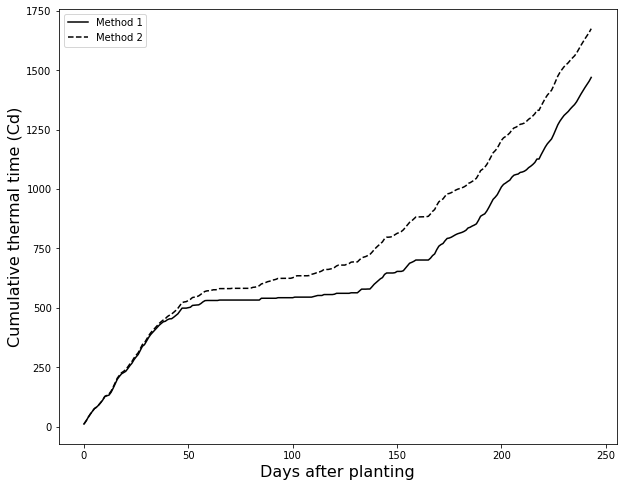

In [51]:
# Compare cumulative thermal time for both methods
plt.figure(figsize=(10,8))
plt.plot(DAP,TTcum1, '-k', label="Method 1")
plt.plot(DAP,TTcum2, '--k', label="Method 2")
plt.xlabel("Days after planting", size=16)
plt.ylabel("Cumulative thermal time (Cd)", size=16)
plt.legend()
plt.show()


## Compare daily thermal between methods

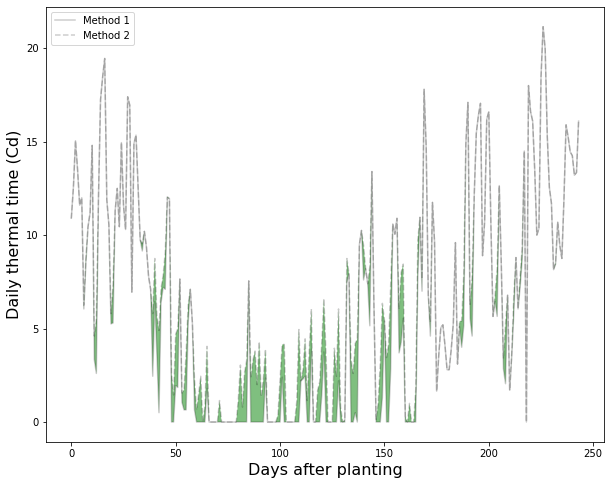

In [59]:
plt.figure(figsize=(10,8))
plt.plot(DAP,TT1, '-k', label="Method 1", alpha=0.2)
plt.plot(DAP,TT2, '--k', label="Method 2", alpha=0.2)
plt.fill_between(DAP,TT1,TT2, facecolor='g', alpha=0.5)
plt.xlabel("Days after planting", size=16)
plt.ylabel("Daily thermal time (Cd)", size=16)
plt.legend()
plt.show()


## References

McMaster, G.S. and Wilhelm, W., 1997. Growing degree-days: one equation, two interpretations. Agricultural and Forest Meteorology 87 (1997) 291-300